In [17]:
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [184]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [10]:
np.shape(xtrain)

(60000, 28, 28)

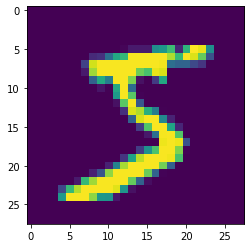

In [154]:
plt.imshow(xtrain[0])

In [13]:
np.shape(x)

(60000, 28, 28, 1)

In [15]:
plt.imshow(x[0], mode')

SyntaxError: EOL while scanning string literal (<ipython-input-15-89b530a3c35c>, line 1)

### Importing data

In [187]:
######################################################################
# Plotting Functions
def rgb_plot(red_array=None, green_array=None, blue_array=None,
             plot=True, save_image=None, filename=None,
             save_location=None):
    '''Returns a plot which represents the input data as a color gradient of
    one of the three color channels available: red, blue or green.

    This function represents the data as a color gradient in one of the three
    basic colors: red, blue or green. The color gradient is represented on the
    x-axis, leaving the y-axis as an arbitrary one. This means that the size or
    the scale of the y-axis do not have a numerical significance. The input
    arrays shoudld be of range zero to one. A minimum of one array should be
    provided. The final representation will be a square plot of the combined
    arrays.

    Parameters
    ----------
    red_array : array
                the data array to be plotted in the red channel.
    green_array : array
                  the data array to be plotted in the green channel.
    blue_array : array
                 the data array to be plotted in the blue channel.
    plot : bool
           if True, the color gradient representation of the data will be
           displayed
    filename : str
               The filename will be the same as the .csv containing the data
               used to create this plot.
    save_location : str
                    String containing the path of the forlder to use when
                    saving the data and the image.
    save_image : bool
                 Option to save the output of the simuation as a plot
                 in a .png file format.
                 The filename used for the file will be the same
                 as the raw data file created in this function.
    Returns
    -------
    rbg_plot :  matplotlib plot
                Plot representing the data as a color gradient on the x-axis
                in one of the three basic colors: red, blue or green
    '''
    arrays = {'red_array': red_array, 'blue_array': blue_array,
              'green_array': green_array}

    given = {k: v is not None for i, (k, v) in enumerate(arrays.items())}
    given_arrays = [(k, arrays[k]) for i, (k, v) in enumerate(given.items())
                    if v is True]
    n = []
    for i in range(len(given_arrays)):
        n.append(len(given_arrays[i][1]))
    assert len(given_arrays) != 0, 'no input array was given.'
    assert all(x == n[0] for x in n), 'the given arrays have different length.\
Check that you are using the right inputs'

    not_given = [k for (k, v) in given.items() if v is False]
    for array in not_given:
        arrays[array] = np.zeros(n[0])

    # Normalize Data from 0 to 1 (aka RGB readable)
    red_array = normalize(arrays['red_array'])
    green_array = normalize(arrays['green_array'])
    blue_array = normalize(arrays['blue_array'])

    arbitrary_axis = np.linspace(0, 1, n[0])

    r_big, a = np.meshgrid(red_array, arbitrary_axis)
    g_big, a = np.meshgrid(green_array, arbitrary_axis)
    b_big, a = np.meshgrid(blue_array, arbitrary_axis)

    rgb_plot = np.ndarray(shape=(n[0], n[0], 3))

    rgb_plot[:, :, 0] = r_big
    rgb_plot[:, :, 1] = g_big
    rgb_plot[:, :, 2] = b_big

    if plot:
        big, bax = plt.subplots(1, 1, figsize=[6, 6])
        bax.imshow(rgb_plot)
        bax.axis('off')

    if save_image:
        filename = str(save_location+filename)
        plt.savefig('{}.png'.format(filename), dpi=100, bbox_inches='tight')
    
    return rgb_plot


def orthogonal_images_add(image_x, image_y, plot=True, save_image=None,
                          filename=None, save_location=None):
    """
    Takes two images and combines them by rotating one of
    them 90 degrees and adds the two up. The resulting array
    is then normalized by channel.
    Takes in two images of shape=(ARBITRARY, Data-axis, 3)

    Parameters
    ----------
    image_x : array-like
              A multidimentional array of shape (n,n,3) with
              entries in range zero to one
    image_y : array-like
              A multidimentional array of shape (n,n,3) with
              entries in range zero to one
    plot : bool
           if True, the color gradient representation of the data will be
           displayed
    filename : str
               The filename will be the same as the .csv containing the data
               used to create this plot.
    save_location : str
                    String containing the path of the forlder to use when
                    saving the data and the image.
    save_image : bool
                 Option to save the output of the simuation as a plot
                 in a .png file format.
                 The filename used for the file will be the same
                 as the raw data file created in this function.
    Returns
    -------
    combined_image :  matplotlib plot
                      Plot representing the data as a color gradient on the
                      x-axis and on the y-axis in one of the three basic
                      colors: red, blue or green

    """
    image_flip = np.ndarray(shape=image_y.shape)
    for channel in range(3):
        image_flip[:, :, channel] = image_y[:, :, channel].transpose()

    combined_image = normalize_image(image_x + image_flip)

    if plot:
        fig, ax = plt.subplots(figsize=[6, 6])
        ax.imshow(combined_image)
        ax.axis('off')
    
    if save_image:
        filename = str(save_location+filename)
        plt.savefig('{}.png'.format(filename), dpi=100, bbox_inches='tight')
    
    plt.close()
    
    return combined_image


def orthogonal_images_mlt(image_x, image_y, plot=True, save_image=None,
                          filename=None, save_location=None):
    '''
    Takes two images and combines them by rotating one of
    them 90 degrees and multiplies them.
    Takes in two images of shape=(ARBITRARY, Data-axis, 3)

    Parameters
    ----------
    image_x : array-like
              A multidimentional array of shape (n,n,3) with
              entries in range zero to one
    image_y : array-like
              A multidimentional array of shape (n,n,3) with
              entries in range zero to one
    plot : bool
           if True, the color gradient representation of the data will be
           displayed
    filename : str
               The filename will be the same as the .csv containing the data
               used to create this plot.
    save_location : str
                    String containing the path of the forlder to use when
                    saving the data and the image.
    save_image : bool
                 Option to save the output of the simuation as a plot
                 in a .png file format.
                 The filename used for the file will be the same
                 as the raw data file created in this function.
    Returns
    -------
    combined_image :  matplotlib plot
                      Plot representing the data as a color gradient on the
                      x-axis and on the y-axis in one of the three basic
                      colors: red, blue or green
    '''
    image_flip = np.ndarray(shape=image_y.shape)
    for channel in range(3):
        image_flip[:, :, channel] = image_y[:, :, channel].transpose()

    combined_image = (image_x * image_flip)

    if plot:
        fig, ax = plt.subplots(figsize=[6, 6])
        ax.imshow(combined_image)
        ax.axis('off')
        
    if save_image:
        filename = str(save_location+filename)
        plt.savefig('{}.png'.format(filename), dpi=100, bbox_inches='tight')
        
    return combined_image

In [191]:
#######################################################################
# Normalization Functions
def normalize(impedance_array):
    '''Function that returns a normalized impedance_array

    The function takes the maximum value of an array and divides each entry of
    the array by it. Additionally, if the minimum of the array is negative, it
    shifts it to zero, so that the resulting normalized array will have a range
    zero to one.

    Parameters
    ----------
    impedance_array : array-like
                      the array to be normalized.

    Returns
    -------
    normalized_impedance_array :  array-like
                                  the normalized array. All entries in this
                                  array should be values in the range
                                  zero to one.
    '''
    temp_array = impedance_array.copy()
    if np.amin(temp_array, axis=0) < 0:
        temp_array += abs(np.amin(temp_array, axis=0))
    if np.amax(temp_array, axis=0) > 1:
        normalized_impedance_array = temp_array/np.amax(temp_array, axis=0)
    else:
        normalized_impedance_array = temp_array

    return normalized_impedance_array

def normalize_image(color_image_array):

    ''' Function that normalizes a color image array.
    The color image array will ahve dimensions (n,n, 3).
    The 'n' value will depends on how big your image is

    Parameters
    ----------

    color_image_array : array-like
                        a multidimentional array of shape (n,n,3)

    Returns
    -------
    normalized_image: array-like
                      the normalized image array. All entries in this
                      array should be values in the range zero to one.
                      The image shape should still be (n,n,3)
    '''
    # Determine the size of the square image
    n = np.shape(color_image_array)[0]
    # Extracting single channels from 3 channel image
    img_r = color_image_array[:, :, 0]
    img_g = color_image_array[:, :, 1]
    img_b = color_image_array[:, :, 2]

    # normalizing data per channel:
    img_r = (img_r - np.min(img_r)) / (np.max(img_r) - np.min(img_r))
    img_g = (img_g - np.min(img_g)) / (np.max(img_g) - np.min(img_g))
    img_b = (img_b - np.min(img_b)) / (np.max(img_b) - np.min(img_b))

    # putting the 3 channels back together:
    normalized_image = np.empty((n, n, 3), dtype=np.float32)
    normalized_image[:, :, 0] = img_r
    normalized_image[:, :, 1] = img_g
    normalized_image[:, :, 2] = img_b

    return normalized_image

In [192]:
# create a ZipFile object
path= './200504_csv_EIS_simulation/'
# image_path= './rgb_Rex_Imy/'
# if not os.path.exists(image_path):
#     os.makedirs(image_path)
rgb_Rex_Imy= []
for entry in os.listdir(path):
    if entry.endswith('.csv'):
        fdata = pd.read_csv(path+entry, skiprows=6)
        filename = entry.rstrip(entry[-4:])
        rgb_image_x = rgb_plot(red_array=fdata['Re_Z_noise [ohm]'], plot=False)
        rgb_image_y = rgb_plot(blue_array=fdata['Im_Z_noise [ohm]'], plot=False)
        combined_image= orthogonal_images_add(rgb_image_x, rgb_image_y, plot=True, save_image=True, filename=filename, save_location='./rgb_images/')
#         loci= image_path + entry
#       The labelling of the data is somewhat hardcoded in this funciton right now. Consider improving it  
        if entry.endswith('noise.csv'):
            label= 0
        else:
            label= 1
        rgb_Rex_Imy.append((entry.rstrip(entry[-4:]), combined_image, label))

/Users/abdulmoeez/miniconda3/envs/direct/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


In [49]:
# Define the base Keras model to use for comparing the different types of plots

def keras_cnn_model(training_set,validation_set, kernel_size=3, epochs=5,input_shape=(50,50, 1)):
    #################################################################
    # Build CNN Model
    model = Sequential()
    model.add(Conv2D(8, (kernel_size,kernel_size), activation='relu', input_shape=input_shape))
    model.add(Conv2D(16, (kernel_size,kernel_size), activation='sigmoid'))
    model.add(Conv2D(32, (kernel_size,kernel_size), activation='sigmoid'))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    #################################################################
    model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    #################################################################
    history= model.fit(training_set, epochs=epochs, shuffle=True, validation_data=validation_set)
    #################################################################
   
    # Let's plot the results
    fig, ax= plt.subplots(1,2, figsize=(8,6))
    
    # Loss
    loss= history.history['loss']
    val_loss= history.history['val_loss']
    epochs= range(1, len(loss)+1)
    
    ax[0].plot(epochs, loss, 'bo', label= 'Training_loss')
    ax[0].plot(epochs, val_loss, 'b', label='Validation_loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].set_title('Loss')

    # Accuracy
    acc= history.history['accuracy']
    val_acc= history.history['val_accuracy']

    ax[1].plot(epochs, acc, 'bo', label= 'Training_acc')
    ax[1].plot(epochs, val_acc, 'b', label='Validation_acc')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    ax[1].set_title('Accuracy')
    
    return model, history

In [18]:
import pickle    
def save_load_data(filename, data=None, save=None, load=None, file_extension='.npy', location='./'):
    """Function to save and load model

    Function that can save or load model depending on given parameters.

    Parameters
    ----------
    filename : str
               string indicating the filename for saving or loading dataset.
    data : list
           dataset that is to be saved or loaded.
    save : bool
           boolean value if true saves the compressed dataset.
    load : bool
           boolean value if true loads the compressed dataset.
    file_extension : str
                     String containing the file extension to use
    location :  str
                string containing the path to the folder to save the pickled file in
    
    Returns
    -------
    loaded_data : list
                  dataset that is loaded from the specified location
    """
    if save:
        pickle.dump(data, open(location + filename+ file_extension, 'wb'))
        return print('Successfully Pickled')
    elif load:
        loaded_data = pickle.load(open(location + filename + file_extension, 'rb'))
        return loaded_data

In [65]:
rgb_xy_data = save_load_data('rgb_Rex_Imy', load=True)

In [66]:
np.shape(rgb_xy_data)

(8000, 3)

In [193]:
image_arrays= np.array([rgb_Rex_Imy[i][1][:] for i in range(len(rgb_Rex_Imy))])

In [194]:
np.shape(image_arrays)

(9000, 80, 80, 3)

In [155]:
image_arrays[0]

array([[[1.        ,        nan, 0.9941787 ],
        [1.        ,        nan, 0.9941787 ],
        [1.        ,        nan, 0.9941787 ],
        ...,
        [1.        ,        nan, 0.9941787 ],
        [1.        ,        nan, 0.9941787 ],
        [1.        ,        nan, 0.9941787 ]],

       [[1.        ,        nan, 0.9928976 ],
        [1.        ,        nan, 0.9928976 ],
        [1.        ,        nan, 0.9928976 ],
        ...,
        [1.        ,        nan, 0.9928976 ],
        [1.        ,        nan, 0.9928976 ],
        [1.        ,        nan, 0.9928976 ]],

       [[1.        ,        nan, 0.99135476],
        [1.        ,        nan, 0.99135476],
        [1.        ,        nan, 0.99135476],
        ...,
        [1.        ,        nan, 0.99135476],
        [1.        ,        nan, 0.99135476],
        [1.        ,        nan, 0.99135476]],

       ...,

       [[1.        ,        nan, 0.99980235],
        [1.        ,        nan, 0.99980235],
        [1.        ,  

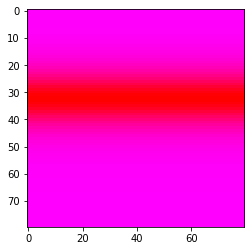

In [164]:
my_image=plt.imshow(image_arrays[0])

In [135]:
type(my_image)

matplotlib.image.AxesImage

In [169]:
image_data = image_arrays.reshape(image_arrays.shape[0], 80, 80, 3).astype('float32')

In [161]:
image_data = image_data*255

In [137]:
img = keras.preprocessing.image.array_to_img(image_data[670],scale=True, data_format="channels_last")

In [108]:
np.shape(image_data)

(8000, 80, 80, 3)

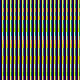

In [201]:
from PIL import Image
Image.frombuffer(mode='RGB', size=(80,80), data=image_data[0])

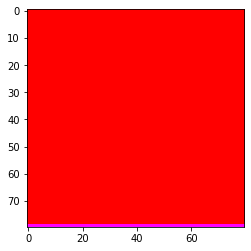

In [163]:
plt.imshow(image_data[0]/255)

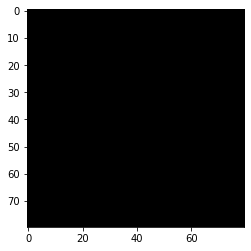

In [109]:
plt.imshow(img)

In [83]:
from PIL import Image

In [197]:
image_labels= np.array([rgb_Rex_Imy[i][:][2] for i in range(len(rgb_Rex_Imy))])
image_labels= keras.utils.to_categorical(image_labels , num_classes=2)

In [198]:
np.shape(image_labels)

(9000, 2)

In [199]:
data = ImageDataGenerator(validation_split=0.1)

training_set = data.flow(x=image_arrays, y=image_labels, batch_size=10, subset='training')
validation_set = data.flow(x=image_arrays, y=image_labels, batch_size=10, subset='validation')

Epoch 1/2
810/810 [==============================] - 56s 69ms/step - loss: 0.8826 - accuracy: 0.4922 - val_loss: 0.6859 - val_accuracy: 0.5011
Epoch 2/2
810/810 [==============================] - 56s 70ms/step - loss: 0.6950 - accuracy: 0.4878 - val_loss: 0.6950 - val_accuracy: 0.5011


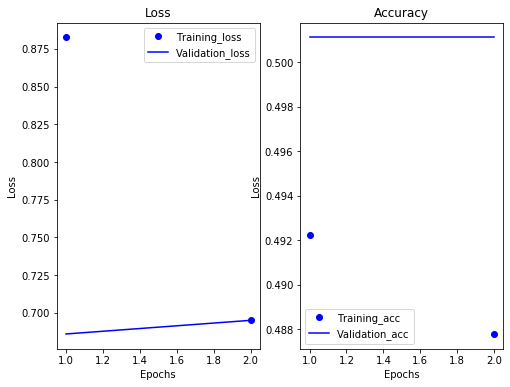

In [200]:
rbg_CNN_model_xy= keras_cnn_model(training_set, validation_set, kernel_size=5, epochs=2,input_shape=(80,80,3))